# Actividad Práctica: Preprocesamiento de Datos con Datasets de Seaborn

**Objetivos de la Actividad**

- Familiarizarse con la carga y exploración de datasets utilizando seaborn y Pandas.
- Aplicar técnicas de limpieza de datos:
    - Manejo de valores faltantes.
    - Detección y tratamiento de outliers.
- Practicar la manipulación y transformación de datos para prepararlos para análisis futuros.

**Datasets Disponibles en Seaborn**

Seaborn es una librería para visualización estadística que incluye varios datasets integrados que son excelentes para practicar análisis de datos. Algunos de los más populares son:

- titanic: Información sobre pasajeros del Titanic.
- tips: Datos de propinas en un restaurante.
- iris: Medidas de flores Iris.
- diamonds: Características y precios de diamantes.
- penguins: Medidas de pingüinos de diferentes especies.

Para esta actividad, utilizaremos el dataset titanic, ya que contiene una variedad de datos numéricos y categóricos, además de valores faltantes y potenciales outliers.

## Parte 1: Carga y Exploración Inicial del Dataset

**Paso 1: Importar Librerías Necesarias**




In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Paso 2: Cargar el Dataset**



In [36]:
# Cargar el dataset 'titanic' de seaborn
df = sns.load_dataset('titanic')


**Paso 3: Exploración Básica**

Ver las primeras filas del DataFrame



In [37]:
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Resumen de la información del DataFrame



In [38]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


Estadísticas descriptivas


In [39]:
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Explicaciones:
- `df.head()`: Muestra las primeras 5 filas del DataFrame para tener una idea general de los datos.
- `df.info()`: Proporciona información sobre el número de filas, columnas, tipos de datos y valores no nulos.
- `df.describe()`: Calcula estadísticas descriptivas para columnas numéricas (media, desviación estándar, mínimos, máximos, etc.).

## Parte 2: Manejo de Valores Faltantes

**Paso 4: Identificar Valores Faltantes**


In [40]:
# Verificar la cantidad de valores faltantes por columna
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Paso 5: Visualización de Valores Faltantes**


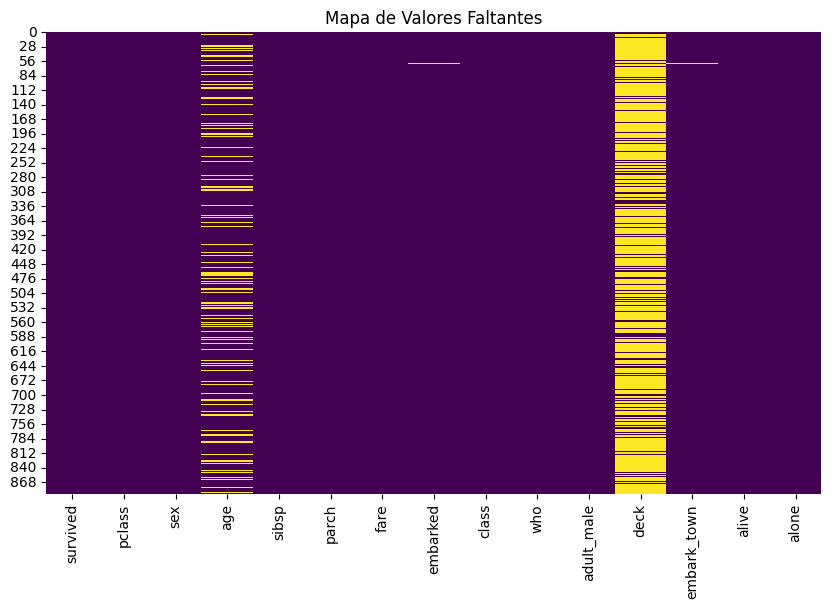

In [41]:
# Utilizar un mapa de calor para visualizar valores faltantes
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()


**Explicaciones:**

- Los valores faltantes pueden afectar el análisis y deben manejarse apropiadamente.
- El mapa de calor proporciona una visión rápida de dónde se encuentran los valores faltantes en el conjunto de datos.

**Paso 6: Manejo de Valores Faltantes**

- Eliminar columnas con muchos valores faltantes



In [42]:
# Por ejemplo, si 'deck' tiene muchos valores faltantes
df.drop(columns=['deck'], inplace=True)


**Imputar valores faltantes**

- Para valores numéricos (e.g., 'age')

In [43]:
# Imputar con la mediana
df['age'].fillna(df['age'].median(), inplace=True)


- Para valores categóricos (e.g., 'embark_town')

In [44]:
# Imputar con la moda
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


**Paso 7: Verificar Nuevamente los Valores Faltantes**

In [45]:
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [46]:
# show the rows with missing values
print(df[df.isnull().any(axis=1)])

# print embarked values

     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male  embark_town alive  alone  
61   woman       False  Southampton   yes   True  
829  woman       False  Southampton   yes   True  


**Explicaciones:**

- Eliminación vs. Imputación: Decidir entre eliminar o imputar depende de la cantidad de valores faltantes y la importancia de la columna.
- Imputación con Mediana o Moda: La mediana es menos sensible a outliers que la media, y la moda es útil para variables categóricas.

## Parte 3: Detección y Tratamiento de Outliers

**Paso 8: Visualización de Outliers**

- Boxplot de la columna 'fare' (tarifa)



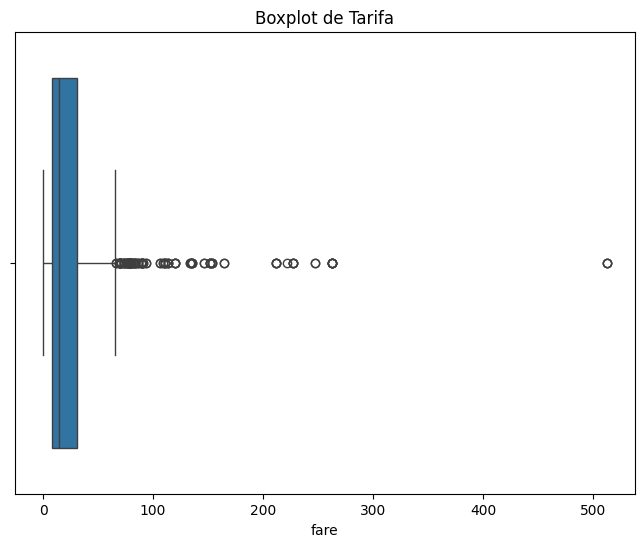

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fare'])
plt.title('Boxplot de Tarifa')
plt.show()


- Histograma de la columna 'fare'



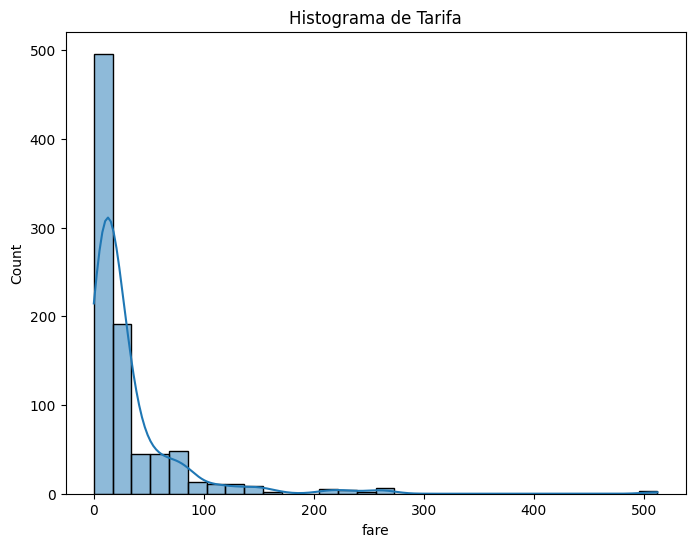

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Histograma de Tarifa')
plt.show()


**Explicaciones:**

- Boxplot: Muestra la distribución de los datos y ayuda a identificar valores atípicos.
- Histograma: Permite visualizar la distribución de frecuencia de los datos.


## Paso 9: Identificar Outliers Numéricamente

- Usando el método del rango intercuartílico (IQR)



In [49]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior}, Limite superior: {limite_superior}")


Limite inferior: -26.724, Limite superior: 65.6344


**Paso 10: Tratamiento de Outliers**

- Opción 1: Eliminar Outliers

In [50]:
df_sin_outliers = df[(df['fare'] >= limite_inferior) & (df['fare'] <= limite_superior)]


- Opción 2: Transformación Logarítmica

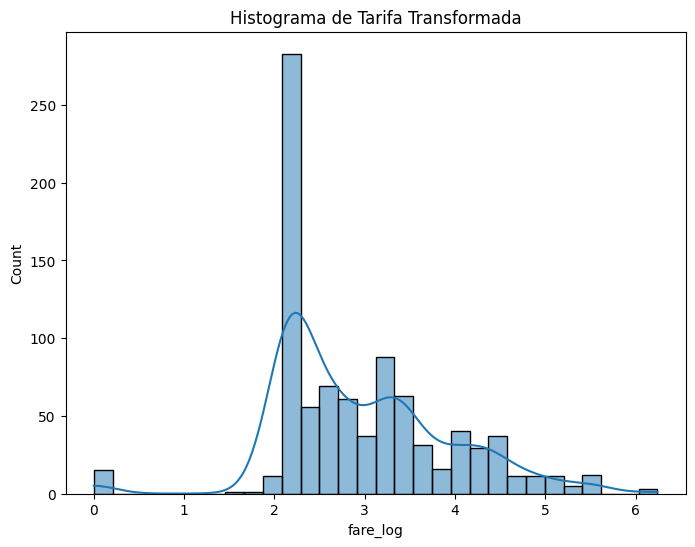

In [51]:
import numpy as np

df['fare_log'] = np.log(df['fare'] + 1)  # Se suma 1 para evitar log(0)

# Visualizar el histograma después de la transformación
plt.figure(figsize=(8, 6))
sns.histplot(df['fare_log'], bins=30, kde=True)
plt.title('Histograma de Tarifa Transformada')
plt.show()


**Explicaciones:**

- Eliminación de Outliers: Puede ser útil, pero podría eliminar datos valiosos si no se tiene cuidado.
- Transformación Logarítmica: Reduce la asimetría y el efecto de valores extremos.

## Parte 4: Manipulación y Transformación de Datos

**Paso 11: Codificación de Variables Categóricas**

- Codificación One-Hot (Variables Dummies)



In [52]:

df = pd.get_dummies(df, columns=['sex', 'embarked', 'class'], drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,fare_log,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,man,True,Southampton,no,False,2.110213,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False,4.280593,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,woman,False,Southampton,yes,True,2.188856,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,woman,False,Southampton,yes,False,3.990834,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,man,True,Southampton,no,True,2.202765,True,False,True,False,True


- Etiquetado de Variables Ordinales



In [56]:
# Asumiendo que 'pclass' es ordinal (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase)
# Ya está en formato numérico, pero podemos asegurarnos de su tipo
df['pclass'] = df['pclass'].astype('category')

**Explicaciones:**

- Variables Dummies: Convierte variables categóricas en variables binarias.
- drop_first=True: Evita la trampa de la multicolinealidad al eliminar una de las categorías.

**Paso 12: Normalización o Escalado de Variables Numéricas**

- Escalado Min-Max



In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])


In [58]:
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,fare_log,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,0.271174,1,0,0.014151,man,True,Southampton,no,False,2.110213,True,False,True,False,True
1,1,1,0.472229,1,0,0.139136,woman,False,Cherbourg,yes,False,4.280593,False,False,False,False,False
2,1,3,0.321438,0,0,0.015469,woman,False,Southampton,yes,True,2.188856,False,False,True,False,True
3,1,1,0.434531,1,0,0.103644,woman,False,Southampton,yes,False,3.990834,False,False,True,False,False
4,0,3,0.434531,0,0,0.015713,man,True,Southampton,no,True,2.202765,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,man,True,Southampton,no,True,2.639057,True,False,True,True,False
887,1,1,0.233476,0,0,0.058556,woman,False,Southampton,yes,True,3.433987,False,False,True,False,False
888,0,3,0.346569,1,2,0.045771,woman,False,Southampton,no,False,3.196630,False,False,True,False,True
889,1,1,0.321438,0,0,0.058556,man,True,Cherbourg,yes,True,3.433987,True,False,False,False,False


- Estandarización (Media = 0, Desviación Estándar = 1)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,fare_log,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,-0.565736,1,0,-0.502445,man,True,Southampton,no,False,2.110213,True,False,True,False,True
1,1,1,0.663861,1,0,0.786845,woman,False,Cherbourg,yes,False,4.280593,False,False,False,False,False
2,1,3,-0.258337,0,0,-0.488854,woman,False,Southampton,yes,True,2.188856,False,False,True,False,True
3,1,1,0.433312,1,0,0.420730,woman,False,Southampton,yes,False,3.990834,False,False,True,False,False
4,0,3,0.433312,0,0,-0.486337,man,True,Southampton,no,True,2.202765,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,man,True,Southampton,no,True,2.639057,True,False,True,True,False
887,1,1,-0.796286,0,0,-0.044381,woman,False,Southampton,yes,True,3.433987,False,False,True,False,False
888,0,3,-0.104637,1,2,-0.176263,woman,False,Southampton,no,False,3.196630,False,False,True,False,True
889,1,1,-0.258337,0,0,-0.044381,man,True,Cherbourg,yes,True,3.433987,True,False,False,False,False


**Explicaciones:**

- Normalización y Estandarización: Importantes para algoritmos sensibles a la escala de los datos, como redes neuronales o KNN.

## Parte 5: Guardar el Dataset Limpio

**Paso 13: Guardar el DataFrame Procesado**


In [60]:
df.to_csv('titanic_limpio.csv', index=False)


**Explicaciones:**

- Al guardar el DataFrame limpio, se facilita su uso en futuras sesiones o modelos.

# Actividad Adicional: Análisis Exploratorio de Datos (EDA)

Aunque el enfoque principal es la recolección y limpieza de datos, puedes aprovechar para realizar un breve análisis exploratorio:

## Paso 14: Análisis de Supervivencia

- Distribución de Supervivientes



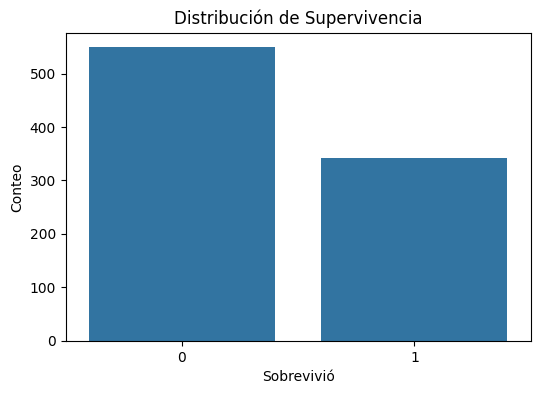

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Distribución de Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.show()


- Supervivencia por Sexo



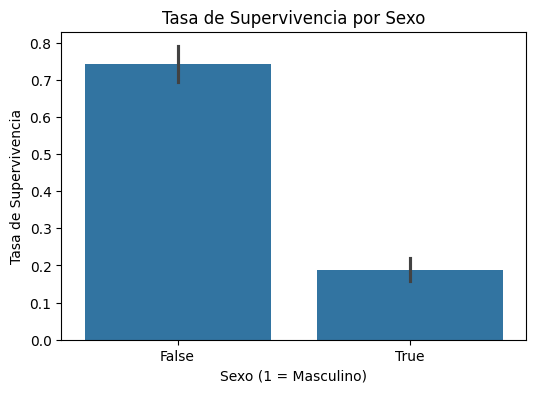

In [62]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex_male', y='survived', data=df)
plt.title('Tasa de Supervivencia por Sexo')
plt.xlabel('Sexo (1 = Masculino)')
plt.ylabel('Tasa de Supervivencia')
plt.show()


**Explicaciones:**

- Análisis Exploratorio: Ayuda a entender mejor los datos y puede revelar patrones interesantes.
- Visualizaciones: Son herramientas poderosas para comunicar hallazgos y comprender relaciones entre variables.

**Consejos y Buenas Prácticas**

- Documenta tu Código: Agrega comentarios y descripciones para facilitar la comprensión.
- Verifica tus Operaciones: Después de cada paso, revisa el resultado para asegurarte de que todo funciona como esperas.
- Explora por tu Cuenta: Experimenta con otras columnas y técnicas de limpieza.